## Get RAW data from world bank

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import geopandas as gpd 

In [ ]:
import requests
import zipfile
import os
def download_and_unzip(url, extract_to='./data/'):
    zip_name = os.path.basename(url)
    local_zip_file = os.path.join(extract_to, zip_name)
    
    # Get file
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_zip_file, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    
    # Extract
    output_dir = os.path.join(extract_to, 'data')
    os.makedirs(output_dir, exist_ok=True)
    
    with zipfile.ZipFile(local_zip_file, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    
    os.remove(local_zip_file)

# Exemple d'utilisation
url = 'https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip'
download_and_unzip(url)


## Load data into Dataframes

In [2]:
import pandas as pd

countries_df = pd.read_csv('data/EdStatsCountry.csv')
countries_series_df = pd.read_csv('data/EdStatsCountry-Series.csv')
data_df = pd.read_csv('data/EdStatsData.csv')
foot_notes_df = pd.read_csv('data/EdStatsFootNote.csv')
series_df = pd.read_csv('data/EdStatsSeries.csv')

## Analyse des dataframes

![title](diag_df.svg)


### EdStatsCountry.csv

In [3]:
countries_df.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [4]:
countries_df.shape

(241, 32)

In [ ]:
#Faire uniquement avec les colonnes interessante sinon trop long
missing_values = countries_df.isnull()


plt.figure(figsize=(8, 4))
sns.heatmap(missing_values, cmap='gray', cbar=False)
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.show()

In [ ]:
# Duplicatas
len(countries_df[countries_df.duplicated()])

In [ ]:
countries_df['Income Group'].unique()

In [ ]:
countries_df['Income Group'] = countries_df['Income Group'].fillna('Other')

In [ ]:
# Regroupement des pays par groupe de revenus
nb_pays_par_revenus = countries_df.groupby('Income Group')[['Short Name']] \
                                  .count() \
                                  .reset_index() \
                                  .sort_values(by='Short Name', ascending=False)

plt.bar(nb_pays_par_revenus['Income Group'], nb_pays_par_revenus['Short Name'])
plt.xlabel('NB pays')
plt.ylabel('Revenus')
plt.xticks(rotation=90)

plt.show()

# Verifier a quelle annee sont associés les income group

### EdStatsCountry-Series.csv

In [ ]:
countries_series_df.head(3)

In [ ]:
countries_series_df.columns.to_list()

In [ ]:
countries_series_df.describe()

In [ ]:
countries_series_df.shape

In [ ]:
countries_series_df.isnull().sum()

In [ ]:
countries_series_df = countries_series_df[['CountryCode', 'SeriesCode', 'DESCRIPTION']]

In [ ]:
nb_pays_serie_code = countries_series_df.groupby('SeriesCode')[['CountryCode']].count()['CountryCode']
plt.bar(nb_pays_serie_code.index, nb_pays_serie_code.values)
plt.xlabel('NB pays')
plt.ylabel('Indicateur')
plt.xticks(rotation=90)

plt.show()

In [ ]:
list = set(countries_df['Country Code'].unique())
list2 = set(countries_series_df['CountryCode'].unique())

In [ ]:
diff = list.difference(list2)

In [ ]:
# Retirer ces faux pays
countries_df = countries_df.loc[~countries_df['Country Code'].isin(diff)]

### EdStatsFootNote.csv

In [ ]:
foot_notes_df.shape

In [ ]:
foot_notes_df.isnull().sum()

In [ ]:
foot_notes_df.head()

In [ ]:
del foot_notes_df['Unnamed: 4']

In [ ]:
foot_notes_df.describe()

### EdStatsSeries.csv

In [ ]:
series_df.head(2)

In [ ]:
series_df.columns

In [ ]:
del series_df['Unnamed: 20']

In [ ]:
series_df.shape

In [ ]:
missing_values = series_df.isnull()


plt.figure(figsize=(8, 4))
sns.heatmap(missing_values, cmap='gray', cbar=False)
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.show()

In [ ]:
# Duplicatas
len(series_df[series_df.duplicated('Series Code')])

In [ ]:
# Compter le nombre d'indicateurs par topic
indicator_by_topic = series_df.groupby('Topic')['Series Code'].count()
best_topics = indicator_by_topic.sort_values(ascending=False).head(5)

plt.barh(best_topics.index, best_topics.values)
plt.xlabel('NB pays')
plt.ylabel('Indicateur')
plt.xticks(rotation=90)

plt.show()


### EdStatsData.csv

In [ ]:
# mssing values cf plus bas
# duplicatas [Country Code, Indicator Code]

#### Valeures manquantes
On voit que le dataset country est clairesemé avec des valeures, pour chaque pays, présente seulement si connues par la banque mondiale

In [ ]:
data_df.head(3)

Le dataset data contient aussi beaucoup de valeures nulles mais ce sont des valeures pour des colonnes d'indicateur.

In [2]:
data_df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']].describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


In [3]:
del data_df['Unnamed: 69']

In [4]:
missing_counts = data_df.isnull().sum() / len(data_df) * 100
missing_counts_df = missing_counts.reset_index()
missing_counts_df.columns = ['Colonne', '% valeurs manquantes']

missing_counts_df.sort_values(by='% valeurs manquantes', ascending=False)

,Colonne,% valeurs manquantes
51,2017,99.983877
50,2016,98.144160
5,1971,95.993258
7,1973,95.992356
6,1972,95.984012
...,...,...
44,2010,72.665036
1,Country Code,0.000000
3,Indicator Code,0.000000
2,Indicator Name,0.000000


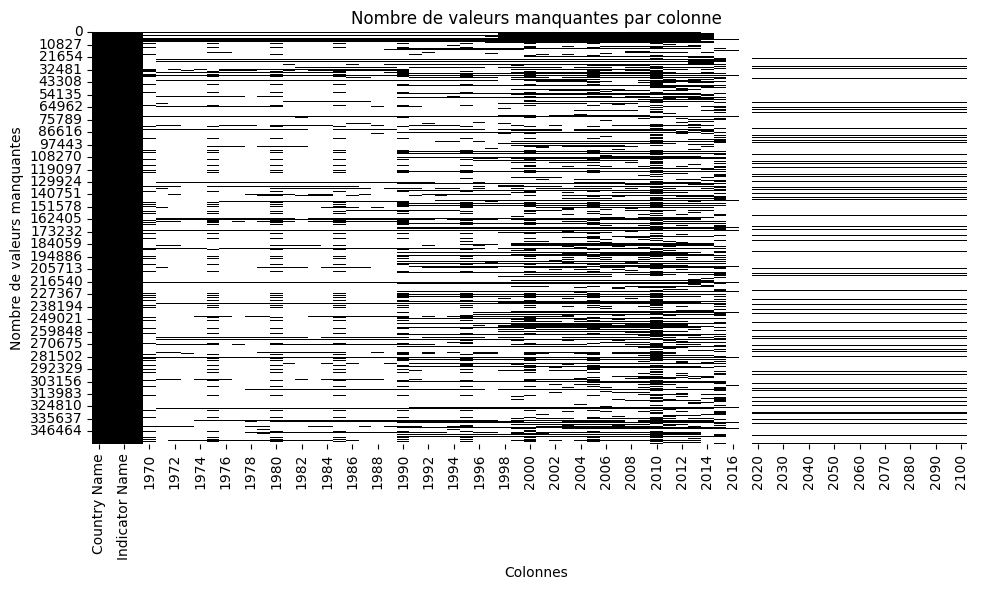

In [77]:
#Filtre pour enlever toutes les lignes ou aucune valeur n'est présente
year_columns = np.arange(1970, 2017).astype('str').tolist()
year_columns.extend(['2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090','2095', '2100'])

data_df = data_df.dropna(how='all', subset=year_columns).reset_index(drop=True)

#Faire uniquement avec les colonnes interessante sinon trop long
missing_values = data_df.isnull()


plt.figure(figsize=(10, 6)) 
sns.heatmap(missing_values, cmap='gray', cbar=False)
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')

plt.tight_layout()
plt.savefig("data_repartition.png")
plt.show()

Les colonnes 2020 à a 2100 sont des predictions pour les années futures et ne sont donc pas bien renseignées

In [6]:
data_unique = set(data_df['Indicator Code'].unique())
series_unique = set(series_df['Series Code'].unique())

unique_in_data_not_in_countries = data_unique - series_unique

len(unique_in_data_not_in_countries)

53

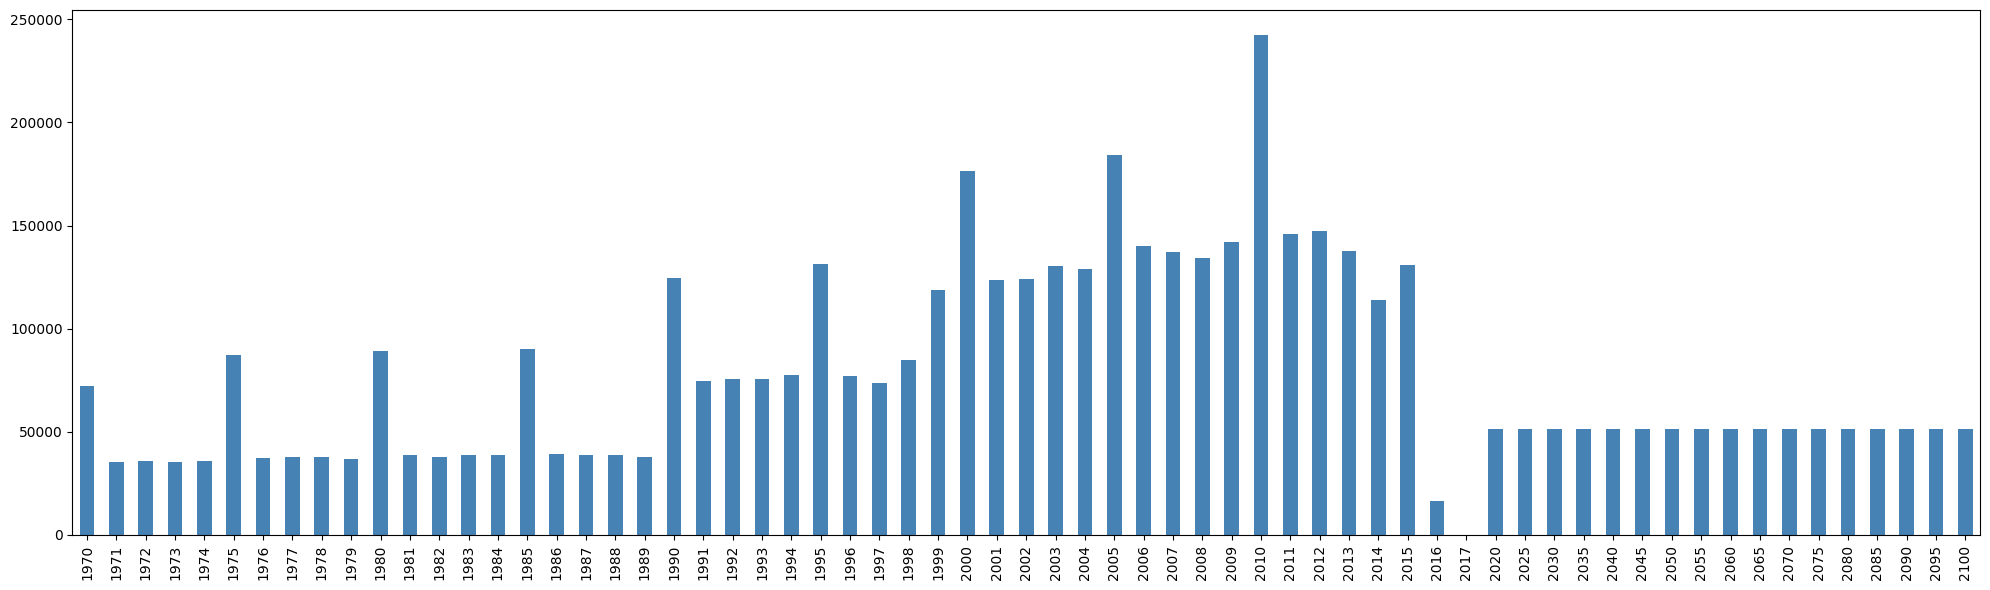

In [78]:
plt.figure(figsize=(20, 6)) 
annees = data_df.loc[:,'1970':'2100'].notnull().sum()
ax1 = annees.plot(kind='bar', color='SteelBlue')
plt.tight_layout()
plt.savefig("data_repartition_years.png")


---

## Choix indicateurs

- Apres observation, le nombre de valeurs pour nos indicateur chute en 2016 et après, je vais donc uniquement garder les années 2005 à 2015

In [13]:
data_series_df = pd.merge(data_df, series_df, how='left', left_on='Indicator Code', right_on='Series Code')

In [14]:
annees_choisies = data_series_df.columns[39:50].tolist()
data_series_df[annees_choisies].drop_duplicates().head(3)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN
1,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN
2,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN


Grouper les lignes par code indicateur et trier par ratio de valeurs définies

In [15]:
data_series_df['Nb defined years'] = data_series_df[annees_choisies].apply(lambda row: row[annees_choisies].notnull().sum(), axis=1)
values_by_indicator = data_series_df.groupby('Indicator Code')['Nb defined years'].sum().sort_values(ascending=False).reset_index()
values_by_indicator

,Indicator Code,Nb defined years
0,SP.POP.TOTL,2622
1,SP.POP.GROW,2621
2,NY.GDP.MKTP.CD,2485
3,NY.GDP.PCAP.CD,2485
4,IT.NET.USER.P2,2484
...,...,...
3643,LO.LLECE.MAT4.P25,0
3644,LO.LLECE.MAT4.P50,0
3645,LO.LLECE.MAT4.P75,0
3646,LO.LLECE.MAT4.P90,0


### Choix d'indicateur de population
- On cherche les indicateurs avec '1524', représentant les indicateurs sur la population des 15-24 ans

In [9]:
# Check indicators for 15 - 24 population
pd.set_option('display.max_colwidth', None)
data_series_df[data_series_df['Indicator Code'].str.contains('1524')]['Indicator Code'].unique()

array(['SE.ADT.1524.LT.ZS', 'SE.ADT.1524.LT.FE.ZS',
       'SE.ADT.1524.LT.FM.ZS', 'SE.ADT.1524.LT.MA.ZS',
       'SP.POP.1524.FE.UN', 'SP.POP.1524.MA.UN', 'SP.POP.1524.TO.UN'],
      dtype=object)

### Choix indicateur economique
- On cherche les indicateurs avec 'NY.GDP', représentant les indicateurs sur le PIB des pays

In [28]:
# Check indicators for GPD
data_series_df[data_series_df['Indicator Code'].str.contains('NY.GDP')]['Indicator Code'].unique()

array(['NY.GDP.MKTP.KD', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.KD',
       'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.PP.KD', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GDP.MKTP.PP.CD'], dtype=object)

### Choix indicateur educatif
- On cherche les indicateurs avec 'SE.PRM', représentant sur l'education dans le primaire des pays
- Cet indicateur nous permet d'evaluer la population d'etudiant cibles future des pays

In [ ]:
# Check indicators for primary enrollment for country evolution projections
data_series_df[data_series_df['Indicator Code'].str.contains('SE.PRM')]['Indicator Code'].unique()

### Choix indicateur educatif
- On cherche les indicateurs avec 'SEC', représentant sur l'education dans le secondaire des pays
- Cette population est donc notre clientèle cible

In [30]:
# Check indicators for secondary enrolment
data_series_df[data_series_df['Indicator Code'].str.contains('SEC')]['Indicator Code'].unique()

array(['BAR.SEC.SCHL.15UP.FE', 'BAR.SEC.SCHL.15UP',
       'BAR.SEC.SCHL.1519.FE', 'BAR.SEC.SCHL.1519',
       'BAR.SEC.SCHL.2024.FE', 'BAR.SEC.SCHL.2024',
       'BAR.SEC.SCHL.25UP.FE', 'BAR.SEC.SCHL.25UP',
       'BAR.SEC.SCHL.2529.FE', 'BAR.SEC.SCHL.2529',
       'BAR.SEC.SCHL.3034.FE', 'BAR.SEC.SCHL.3034',
       'BAR.SEC.SCHL.3539.FE', 'BAR.SEC.SCHL.3539',
       'BAR.SEC.SCHL.4044.FE', 'BAR.SEC.SCHL.4044',
       'BAR.SEC.SCHL.4549.FE', 'BAR.SEC.SCHL.4549',
       'BAR.SEC.SCHL.5054.FE', 'BAR.SEC.SCHL.5054',
       'BAR.SEC.SCHL.5559.FE', 'BAR.SEC.SCHL.5559',
       'BAR.SEC.SCHL.6064.FE', 'BAR.SEC.SCHL.6064',
       'BAR.SEC.SCHL.6569.FE', 'BAR.SEC.SCHL.6569',
       'BAR.SEC.SCHL.7074.FE', 'BAR.SEC.SCHL.7074',
       'BAR.SEC.SCHL.75UP.FE', 'BAR.SEC.SCHL.75UP',
       'BAR.SEC.CMPT.15UP.FE.ZS', 'BAR.SEC.ICMP.15UP.FE.ZS',
       'BAR.SEC.CMPT.1519.FE.ZS', 'BAR.SEC.ICMP.1519.FE.ZS',
       'BAR.SEC.CMPT.2024.FE.ZS', 'BAR.SEC.ICMP.2024.FE.ZS',
       'BAR.SEC.CMPT.25UP.FE.ZS', 'BA

### Choix indicateur educatif
- On cherche les indicateurs avec 'TER', représentant sur l'education dans le tertiaire des pays
- Cette population est donc notre clientèle cible

In [31]:
# Check indicators for terciary enrolment
data_series_df[data_series_df['Indicator Code'].str.contains('TER')]['Indicator Code'].unique()

array(['BAR.TER.SCHL.15UP.FE', 'BAR.TER.SCHL.15UP',
       'BAR.TER.SCHL.1519.FE', 'BAR.TER.SCHL.1519',
       'BAR.TER.SCHL.2024.FE', 'BAR.TER.SCHL.2024',
       'BAR.TER.SCHL.25UP.FE', 'BAR.TER.SCHL.25UP',
       'BAR.TER.SCHL.2529.FE', 'BAR.TER.SCHL.2529',
       'BAR.TER.SCHL.3034.FE', 'BAR.TER.SCHL.3034',
       'BAR.TER.SCHL.3539.FE', 'BAR.TER.SCHL.3539',
       'BAR.TER.SCHL.4044.FE', 'BAR.TER.SCHL.4044',
       'BAR.TER.SCHL.4549.FE', 'BAR.TER.SCHL.4549',
       'BAR.TER.SCHL.5054.FE', 'BAR.TER.SCHL.5054',
       'BAR.TER.SCHL.5559.FE', 'BAR.TER.SCHL.5559',
       'BAR.TER.SCHL.6064.FE', 'BAR.TER.SCHL.6064',
       'BAR.TER.SCHL.6569.FE', 'BAR.TER.SCHL.6569',
       'BAR.TER.SCHL.7074.FE', 'BAR.TER.SCHL.7074',
       'BAR.TER.SCHL.75UP.FE', 'BAR.TER.SCHL.75UP',
       'BAR.TER.CMPT.15UP.FE.ZS', 'BAR.TER.ICMP.15UP.FE.ZS',
       'BAR.TER.CMPT.1519.FE.ZS', 'BAR.TER.ICMP.1519.FE.ZS',
       'BAR.TER.CMPT.2024.FE.ZS', 'BAR.TER.ICMP.2024.FE.ZS',
       'BAR.TER.CMPT.25UP.FE.ZS', 'BA

### Choix indicateur demographique
- On cherche les indicateurs avec 'SP.POP.1115', représentant sur la population des 11 - 15 ans dans les pays
- Cette population est donc notre clientèle cible

In [32]:
# Check indicators for 11 - 15 population
# Cette tranche d'age n'est pas notre cible mais nous permettra de nous projeter
data_series_df[data_series_df['Indicator Code'].str.contains('SP.POP.1115')]['Indicator Code'].unique()

array(['SP.POP.1115.FE.UN', 'SP.POP.1115.MA.UN', 'SP.POP.1115.TO.UN'],
      dtype=object)

Indicateurs :
 - NY.GDP.PCAP.CD (PIB)
 - IT.NET.USER.P2 (Acces internet)
 - SP.POP.GROW (Croissance de la population)
 - SP.POP.1524.TO.UN (Population totale 15 - 24 ans)
 - SP.POP.1115.TO.UN (Population totale 11 - 15 ans)
 - SE.PRM.ENRR (Taux d'enrolment dans le primaire)
 - SE.SEC.ENRR (Taux d'enrolment dans le secondaire)
 - SE.TER.ENRR (Taux d'enrolment dans le tertiaire)

In [10]:
selected_indicators = ['NY.GDP.PCAP.CD', 'IT.NET.USER.P2', 'SP.POP.GROW', 'SP.POP.1524.TO.UN', 'SP.POP.1115.TO.UN', 'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR']

Gardons uniquement les colonnes numeriques qui nous interessent

In [86]:
# Filtrer pour garder les dates voulues
colonnes_a_retirer = ['Unit of measure', 'Base Period', 'Other notes', 'Limitations and exceptions', 
        'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type']
colonnes_a_garder = [x for x in data_series_df.columns.to_list() if not x.isdigit() and x not in colonnes_a_retirer]
colonnes_a_garder.extend(annees_choisies)



data_filtered = data_series_df[colonnes_a_garder]

# Filtrer pour garder les indicateurs voulus
data_filtered = data_filtered[data_filtered['Indicator Code'].isin(selected_indicators)]
del data_filtered['Unnamed: 20']
del data_filtered['Unnamed: 69']

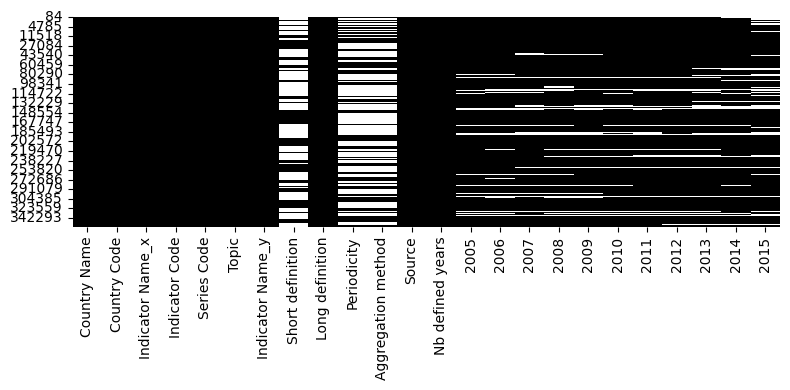

In [87]:
missing_values = data_filtered.isnull()

plt.figure(figsize=(8, 4))
sns.heatmap(missing_values, cmap='gray', cbar=False)
plt.tight_layout()
plt.savefig("data_repartition_years_indicators.png")

Petit redressement des features

In [18]:
countries_data = pd.merge(countries_df, data_filtered, how='inner', on='Country Code')

In [19]:
countries_data.loc[countries_data['Region'].isna(), 'Region'] = 'Europe & Central Asia'
countries_data.loc[countries_data['Income Group'].isna(), 'Income Group'] = 'High income: OECD'

Observons les dernières valeures de nos indicateurs pour chaque pays

In [20]:
countries_data['Last Defined Value'] = countries_data[annees_choisies].apply(
    lambda row: next((row[col] for col in reversed(annees_choisies) if pd.notna(row[col])), None),
    axis=1
)

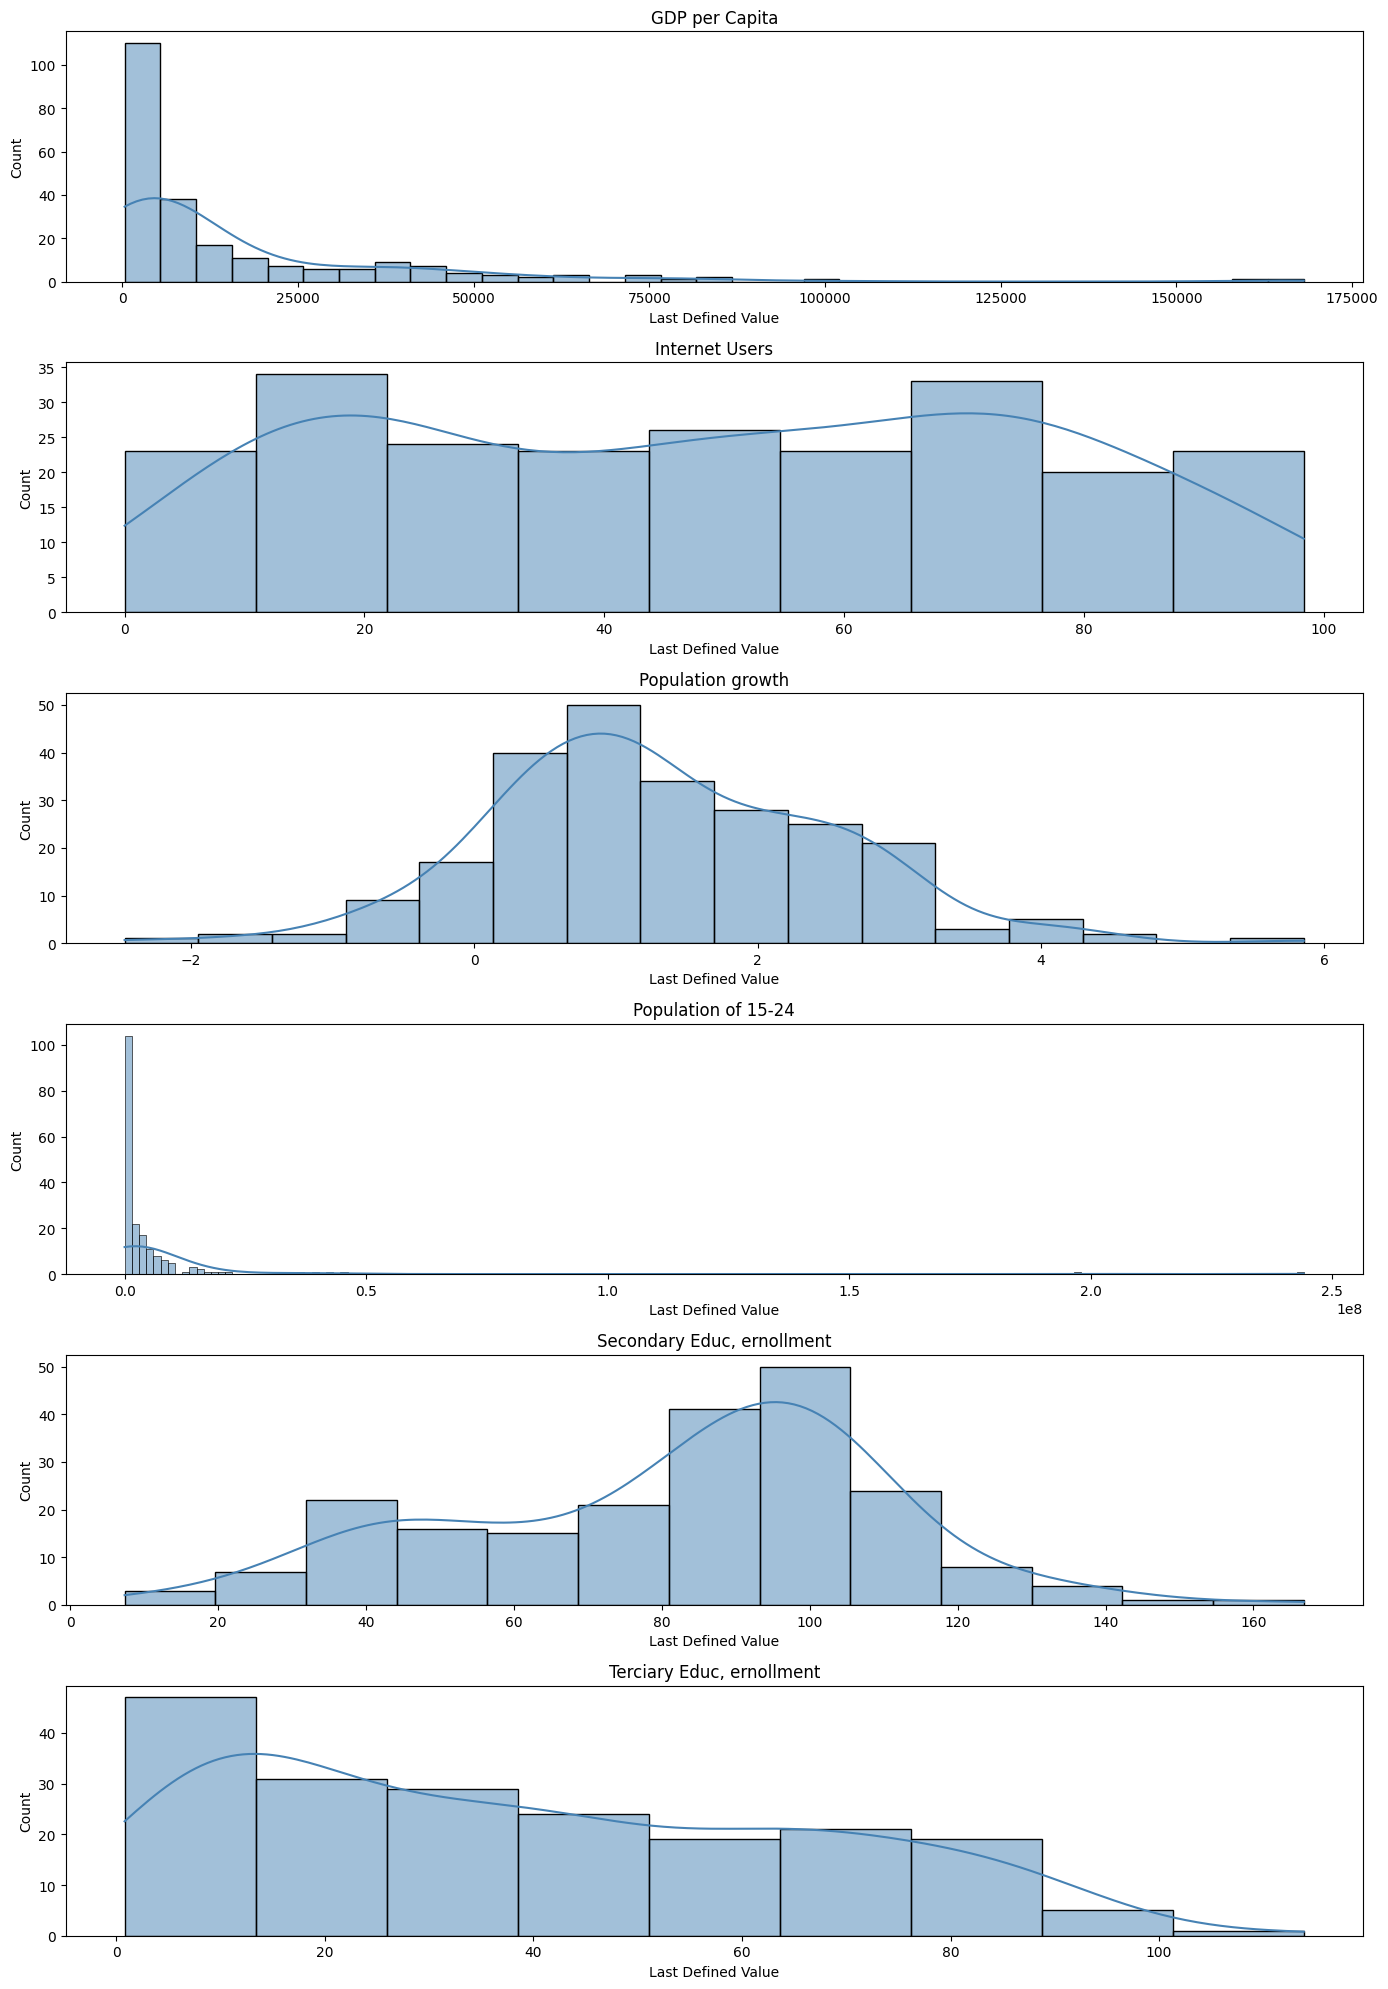

In [64]:
gpd_indics = countries_data[countries_data['Indicator Code'] == 'NY.GDP.PCAP.CD']
internet_indics = countries_data[countries_data['Indicator Code'] == 'IT.NET.USER.P2']
pop_grow_indics = countries_data[countries_data['Indicator Code'] == 'SP.POP.GROW']
pop_1524_indics = countries_data[countries_data['Indicator Code'] == 'SP.POP.1524.TO.UN']
edu_sec_indics = countries_data[countries_data['Indicator Code'] == 'SE.SEC.ENRR']
edu_ter_indics = countries_data[countries_data['Indicator Code'] == 'SE.TER.ENRR']

fig, axes = plt.subplots(6, 1, figsize=(14, 20), sharey=False)

sns.histplot(gpd_indics['Last Defined Value'], kde=True, color='SteelBlue', ax=axes[0])
axes[0].set_title('GDP per Capita')

sns.histplot(internet_indics['Last Defined Value'], kde=True, color='SteelBlue', ax=axes[1])
axes[1].set_title('Internet Users')

sns.histplot(pop_grow_indics['Last Defined Value'], kde=True, color='SteelBlue', ax=axes[2])
axes[2].set_title('Population growth')

sns.histplot(pop_1524_indics['Last Defined Value'], kde=True, color='SteelBlue', ax=axes[3])
axes[3].set_title('Population of 15-24')

sns.histplot(edu_sec_indics['Last Defined Value'], kde=True, color='SteelBlue', ax=axes[4])
axes[4].set_title('Secondary Educ, ernollment')

sns.histplot(edu_ter_indics['Last Defined Value'], kde=True, color='SteelBlue', ax=axes[5])
axes[5].set_title('Terciary Educ, ernollment')

plt.tight_layout()
plt.show()

- On observe des échelles et disparité différentes entre nos indicateurs, une normalisation pourrait aider à rapprocher ces échelles afin de mieux comparer les indicateurs

In [23]:
countries_data_formatted = countries_data.loc[:, ['Country Name'] + ['Indicator Code'] + annees_choisies]

In [24]:

scaler_pow = PowerTransformer(method='yeo-johnson')

def normalize_indicators(df):
    normalized_data = []
    for indicator, group in df.groupby('Indicator Code'):
        year_columns = [str(year) for year in range(2005, 2016)]
        
        group[year_columns] = scaler_pow.fit_transform(group[year_columns])
        
        normalized_data.append(group)

    return pd.concat(normalized_data)

countries_data_scaled = normalize_indicators(countries_data_formatted)
countries_data_scaled

,Country Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Aruba,IT.NET.USER.P2,0.663256,0.612816,0.595008,0.993024,1.027436,1.022178,1.102379,1.129600,1.178312,1.252757,1.337829
12,Afghanistan,IT.NET.USER.P2,-1.233574,-1.135383,-1.264317,-1.372100,-1.200371,-1.302662,-1.304087,-1.379478,-1.469915,-1.513796,-1.561079
20,Angola,IT.NET.USER.P2,-1.259445,-1.280862,-1.309053,-1.360284,-1.378246,-1.445588,-1.495381,-1.296990,-1.259927,-1.313678,-1.335494
28,Albania,IT.NET.USER.P2,-0.391800,-0.234876,-0.016784,0.219398,0.631510,0.599773,0.602120,0.642280,0.615499,0.604687,0.591768
35,Andorra,IT.NET.USER.P2,0.985865,1.117417,1.414643,1.330962,1.414934,1.416876,1.364343,1.409264,1.528013,1.555441,1.564660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,Kosovo,SP.POP.GROW,-0.981319,-0.358398,-0.336031,-0.349685,-0.327554,-0.352242,-0.298224,-0.353970,-0.176908,-1.151440,-2.143515
1725,"Yemen, Rep.",SP.POP.GROW,0.880636,0.820711,0.795367,0.793900,0.845455,0.886724,0.925924,0.961263,0.956201,0.975694,1.007382
1733,South Africa,SP.POP.GROW,-0.034935,-0.016270,0.011758,0.020158,0.064508,0.078168,0.123815,0.172690,0.179703,0.208957,0.251259
1741,Zambia,SP.POP.GROW,0.829114,0.791594,0.781997,0.804589,0.894217,0.988437,1.081853,1.164347,1.218637,1.303013,1.406307


- Interessons nous aux valeures definies pour nos indicateurs en 2015

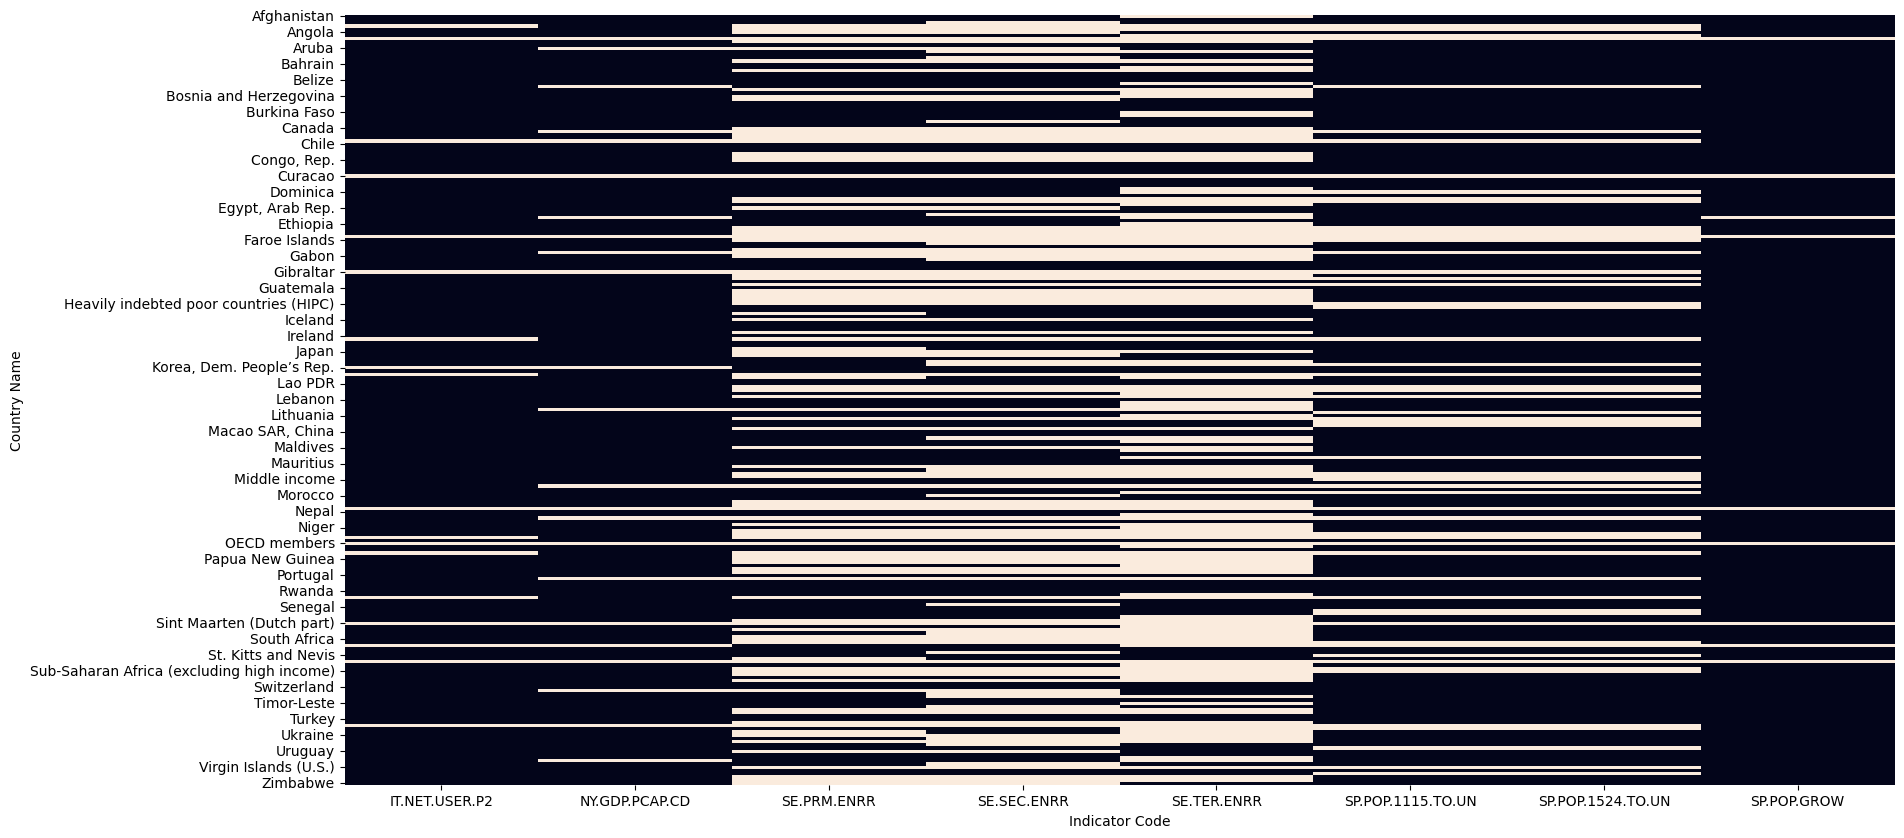

<Figure size 640x480 with 0 Axes>

In [25]:
pivoted_data = countries_data_scaled.pivot_table(index=['Country Name'], columns="Indicator Code")['2015']

plt.figure(figsize=(20,10))
sns.heatmap(pivoted_data.isna(), cbar=False)
plt.show() 
plt.savefig("2015-indicators.png")


On cherche maintenant a imputer les données manquantes

In [26]:
countries_data_scaled[annees_choisies] = countries_data_scaled[annees_choisies].fillna(method='ffill', axis=1)
pivoted_data = countries_data_scaled.pivot_table(index=['Country Name'], columns="Indicator Code")['2015']

C:\Users\Rafael\AppData\Local\Temp\ipykernel_8960\1109383043.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  countries_data_scaled[annees_choisies] = countries_data_scaled[annees_choisies].fillna(method='ffill', axis=1)


Voyons le resultat, la methode ffill permet de remplir les valeures manquantes pour nos indicateurs, elle a neanmoins besoin d'une valeure definie sur la première colonne d'année pour fonctionner.
Il nous reste donc des NaNs

In [27]:
filtered_data = countries_data_scaled.loc[countries_data_scaled['Indicator Code'].isin(selected_indicators), ['Country Name'] + ['Indicator Code'] + annees_choisies]
filtered_data.loc[filtered_data['Country Name'] == 'United States']

,Country Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1657,United States,IT.NET.USER.P2,1.495835,1.447768,1.475239,1.396107,1.282022,1.231542,1.118993,1.145947,0.993035,0.968342,0.933545
1653,United States,NY.GDP.PCAP.CD,1.471638,1.448377,1.404072,1.371579,1.430105,1.428275,1.389507,1.446083,1.444225,1.480877,1.583854
1654,United States,SE.PRM.ENRR,-0.207336,-0.141707,-0.098170,-0.052019,-0.160799,-0.328814,-0.329414,-0.365785,-0.390923,-0.406885,-0.311480
1655,United States,SE.SEC.ENRR,0.713695,0.685856,0.684338,0.651047,0.575201,0.482709,0.533764,0.506419,0.371160,0.379517,0.379517
1656,United States,SE.TER.ENRR,1.537584,1.500375,1.484180,1.512549,1.547016,1.637201,1.634951,1.658005,1.518754,1.432501,1.453011
1659,United States,SP.POP.1115.TO.UN,1.976910,1.978014,1.951007,1.946466,1.941650,1.937580,1.934619,1.932584,1.931320,1.930438,1.929641
1660,United States,SP.POP.1524.TO.UN,2.002846,2.007525,1.985400,1.987895,1.989859,1.991031,1.991334,1.990825,1.989558,1.987666,1.985285
1658,United States,SP.POP.GROW,-0.285867,-0.245332,-0.236086,-0.252497,-0.277273,-0.328644,-0.381125,-0.388547,-0.441339,-0.423636,-0.465079


On retire alors les lignes qui ne sont pas biens remplies

In [31]:
s_pays_indic_manquant=pivoted_data.notnull().sum(axis=1)
i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<5].index
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
df_pays_retires=pivoted_data.loc[i_pays_indic_manquant, :].sort_values(by='SP.POP.1524.TO.UN', ascending=False)
df_pays_retires

Nombre de pays à retirer : 19


Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.PRM.ENRR,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1115.TO.UN,SP.POP.1524.TO.UN,SP.POP.GROW
Country Name,,,,,,,,
American Samoa,NaN,0.504615,NaN,NaN,NaN,NaN,NaN,-0.943400
Channel Islands,NaN,1.654590,NaN,NaN,NaN,NaN,NaN,-0.677662
Curacao,NaN,NaN,4.641912,0.067784,-0.727054,NaN,NaN,-0.250511
Faroe Islands,1.490843,1.507709,NaN,NaN,NaN,NaN,NaN,-0.880271
French Polynesia,0.632241,NaN,NaN,NaN,NaN,NaN,NaN,-0.407168
Gibraltar,0.912464,NaN,NaN,NaN,NaN,NaN,NaN,-0.613848
Greenland,0.725376,1.337873,NaN,NaN,NaN,NaN,NaN,-1.399694
Guam,0.891727,1.257152,NaN,NaN,NaN,NaN,NaN,-0.650483
Isle of Man,NaN,1.839051,NaN,NaN,NaN,NaN,NaN,-0.493778


In [34]:
pivoted_data.dropna(thresh = 8, inplace=True)
print(f'Nombre de pays restant : {filtered_data.shape[0]}')

Nombre de pays restant : 1752


### Scores

- On normalise les valeures afin d'avoir des échelles cohérentes entre nos indicateurs
- Nous allons maintenant tenter de calculer un score se basant sur une somme pondérée de tous les indicateurs

In [35]:
weights = {
    "IT.NET.USER.P2": 4,
    "NY.GDP.PCAP.CD": 2,
    "SE.PRM.ENRR": 2,
    "SE.SEC.ENRR": 5,
    "SE.TER.ENRR": 5,
    "SP.POP.1115.TO.UN": 1,
    "SP.POP.1524.TO.UN": 4,
    "SP.POP.GROW": 3
}
# Vérifiez que seules les colonnes des indicateurs (celles dans weights) sont utilisées
indicators = list(weights.keys())

# Calcul de la colonne 'Score' en ignorant "Country Name"
pivoted_data['Score'] = pivoted_data[indicators].apply(
    lambda row: sum(row[col] * weights[col] for col in weights if not pd.isna(row[col])),
    axis=1
)

list_countries_filtered = pivoted_data.sort_values(by='Score',ascending=False).head(10)
list_countries_filtered

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.PRM.ENRR,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1115.TO.UN,SP.POP.1524.TO.UN,SP.POP.GROW,Score
Country Name,,,,,,,,,
Australia,1.222573,1.584895,-0.158839,2.105187,1.526923,0.359093,0.414061,0.091040,28.191411
Belgium,1.236504,1.351826,-0.010582,3.175983,1.149314,-0.085282,-0.050650,-0.594163,27.184624
Sweden,1.392010,1.510850,1.452383,2.079976,0.761423,-0.161642,-0.099139,-0.187294,24.581421
United Kingdom,1.430428,1.416076,0.369763,1.666999,0.571256,0.884811,0.959489,-0.409396,23.979241
United States,0.933545,1.583854,-0.311480,0.379517,1.453011,1.929641,1.985285,-0.465079,23.917110
Netherlands,1.422810,1.422923,0.027603,1.877875,1.284874,0.203240,0.209131,-0.712223,23.309133
Finland,1.275112,1.385988,-0.208910,2.449092,1.493702,-0.448636,-0.404615,-0.811725,22.666304
Spain,1.054405,1.041702,0.052007,1.650437,1.557857,0.637713,0.627816,-1.169431,22.087192
Denmark,1.548931,1.540176,-0.210225,1.690997,1.370013,-0.376984,-0.349193,-0.485023,20.931849


- Faison une carte du monde afin d'observe la distribution des scores

In [36]:
# Get geopandas data
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
worldmap = gpd.read_file(url)

pivoted_data = pivoted_data.reset_index()

# Petit redressement pour coller au noms dans la data geographique
pivoted_data.loc[pivoted_data['Country Name'] == 'United States', 'Country Name'] = 'United States of America'

# Récupérer la bonne colonne dans le dataset géographique afin de matcher les noms des pays avec notre dataset
df_temp=worldmap.sort_values(by = ['ISO_A3'])
df_temp=df_temp.loc[:,['ISO_A3','NAME']]
df_temp=df_temp.rename(columns={'ISO_A3':'ISO'})
df_temp=df_temp.set_index('ISO')

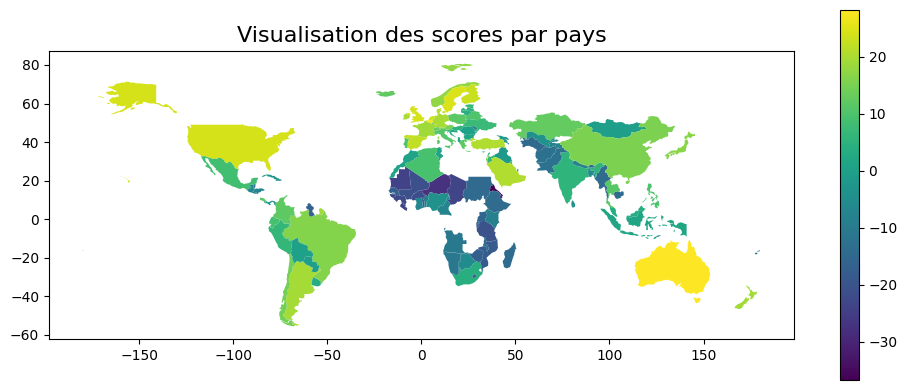

In [118]:
df_score_geo = worldmap.merge(pivoted_data, left_on='NAME', right_on='Country Name')[['geometry', 'Country Name', 'Score']]
fig, ax = plt.subplots(figsize=(10, 4))
df_score_geo.plot(column='Score', cmap='viridis', legend=True, ax=ax, 
                  missing_kwds={"color": "lightgrey", "label": "No Data"})

ax.set_title('Visualisation des scores par pays', fontsize=16)

plt.tight_layout()
plt.savefig("score-map.png")
plt.show()



- On voit que les pays avec les meilleures scores sont dispersés sur le globe, il est donc préférable d'adopter une approche par pays plutot que par région, afin de n'en exclure aucun

- Regardons maintenant l'evoltion de l'enrollment dans le secondaire pour nos 10 meilleur pays

In [48]:
data_1524_indics = countries_data[countries_data['Indicator Code'] == 'SE.SEC.ENRR']
list_countries_filtered = list_countries_filtered.reset_index()
data_1524_indics = data_1524_indics[
    data_1524_indics['Country Name'].isin(list_countries_filtered['Country Name'].unique())
].sort_values(by='Last Defined Value', ascending=False)

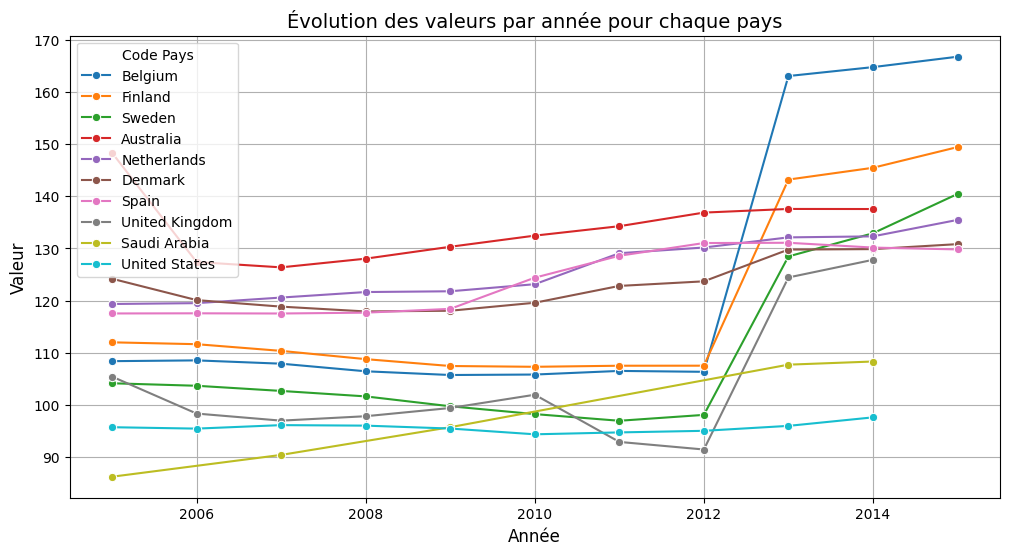

In [46]:
# Transformation au format long
countries_educ_evolution = data_1524_indics.loc[:, ["Country Name"] + annees_choisies]
df_long = countries_educ_evolution.melt(id_vars='Country Name', var_name='Year', value_name='Value')

# Convertir 'Year' en numérique pour un meilleur affichage
df_long['Year'] = pd.to_numeric(df_long['Year'])
df_long.groupby('Country Name')['Value'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
# Visualisation avec seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Year', y='Value', hue='Country Name', marker='o')

# Options du graphe
plt.title("Évolution des valeurs par année pour chaque pays", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Valeur", fontsize=12)
plt.legend(title='Code Pays', fontsize=10)
plt.grid(True)

# Afficher le graphe
plt.savefig("sec-enrr-top-10.png")
plt.show()

- On constate que certains pays montre une bonne evolution sur cet indicateur.
- Afin de mieux représenter ces évolutions dans notre choix de pays, nous pouvons faire une régression linéaire sur nos indicateurs afin de predire les scores a X années.
- Nous pourrons ensuite comparer les evolutions de nos score de pays sur les années à venir

In [56]:
filtered_top_10 = filtered_data.loc[filtered_data['Country Name'].isin(list_countries_filtered['Country Name'].unique())]

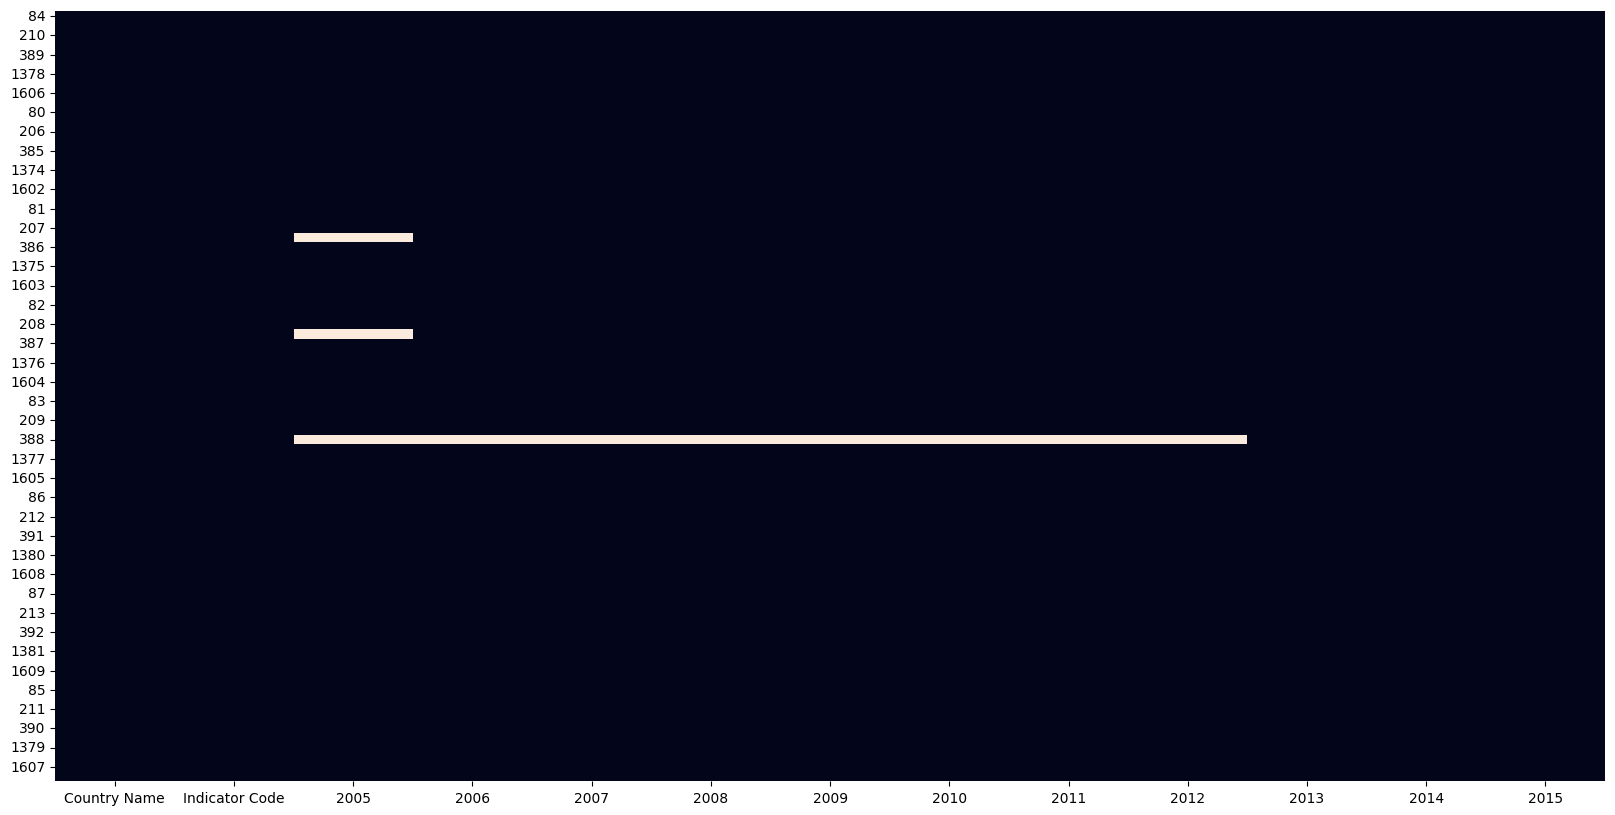

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(filtered_top_10.isna(), cbar=False)
plt.show() 

On peut voir qu'il reste quelques valeures non définies, nous pouvons les fill avec les colonnes adjacentes afin de ne pas empecher la regression lineaire. Une autre option serai d'utiliser un modele de regression qui n'est pas sensible aux valeures NaN

In [57]:
filtered_top_10 = filtered_top_10.fillna(method='bfill', axis=1)

C:\Users\Rafael\AppData\Local\Temp\ipykernel_8960\728933878.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_top_10 = filtered_top_10.fillna(method='bfill', axis=1)


### Regression linéaire

In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


df = pd.DataFrame(filtered_top_10)
df.columns = df.columns.astype(str)

years = list(map(str, range(2005, 2016))) 
future_years = list(range(2016, 2021))

# Créer les données pour la régression
X = np.array(list(range(2005, 2016))).reshape(-1, 1)  # Années sous forme d'array 2D pour sklearn
predictions = []

for _, group in df.groupby(["Country Name", "Indicator Code"]):
    y = group.iloc[0, 2:].values  # Colonnes des années (2005 à 2015)
    
    y = pd.to_numeric(y, errors='coerce')  # Convertir en numérique (remplace les non-numériques par NaN)
    
    if np.any(np.isnan(y)):
        continue  # Ignorer les séries contenant des valeurs NaN
    
    # Entrainer le modele
    model = LinearRegression()
    model.fit(X, y)
    
    # Prédictions pour les années futures
    future_X = np.array(future_years).reshape(-1, 1)
    y_pred = model.predict(future_X)
    
    for year, value in zip(future_years, y_pred):
        predictions.append({
            "Country Name": group["Country Name"].iloc[0],
            "Indicator Code": group["Indicator Code"].iloc[0],
            "Year": year,
            "Predicted Value": value
        })

predictions_df = pd.DataFrame(predictions)

original_long = df.melt(
    id_vars=["Country Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)

original_long["Year"] = pd.to_numeric(original_long["Year"], errors='coerce')
predictions_df.rename(columns={"Predicted Value": "Value"}, inplace=True)

consolidated_df = pd.concat([original_long, predictions_df], ignore_index=True)

# Reformattage du dataframe pour le résultat
pivot_df = consolidated_df.pivot(
    index=["Country Name", "Indicator Code"], 
    columns="Year", 
    values="Value"
).reset_index()

# Trier les colonnes par ordre croissant des années, tout en respectant les colonnes non numériques
year_columns = sorted([col for col in pivot_df.columns if isinstance(col, (int, str)) and str(col).isdigit()])
non_year_columns = [col for col in pivot_df.columns if col not in year_columns]
pivot_df = pivot_df[non_year_columns + year_columns]

# Sauvegarder si nécessaire
# pivot_df.to_csv("consolidated_predictions_wide.csv", index=False)


### Visualisation des regressions

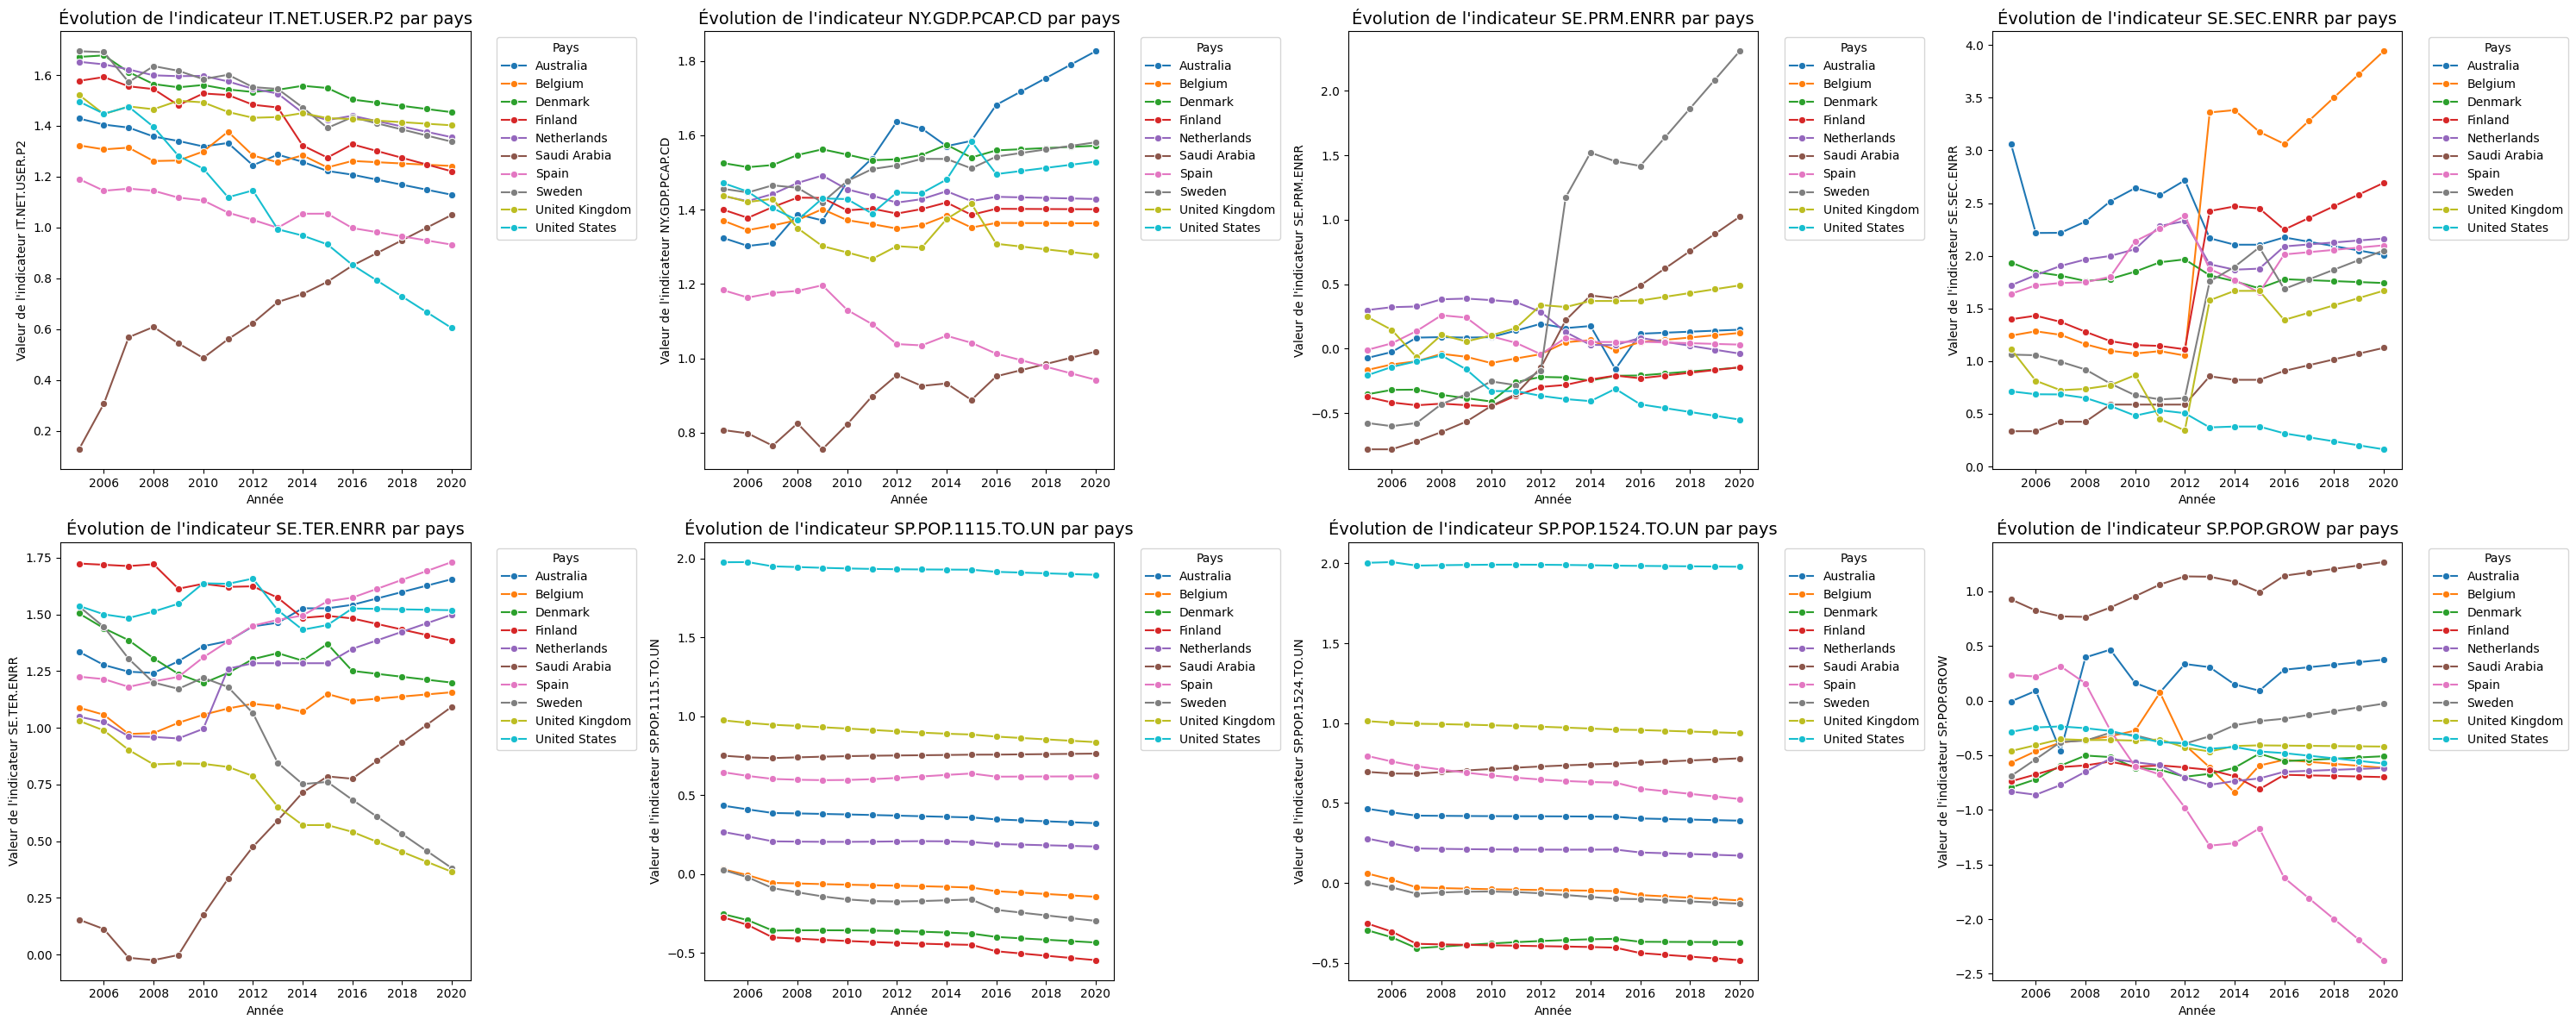

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

indicators = pivot_df['Indicator Code'].unique()

n_cols = 4
n_rows = (len(indicators) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 6 * n_rows))
axes = axes.flatten()

for i, indicator in enumerate(indicators):

    indicator_data = pivot_df.loc[pivot_df['Indicator Code'] == indicator]

    indicator_long = indicator_data.melt(id_vars=["Country Name", "Indicator Code"],
                                         var_name="Year", value_name="Value")
    indicator_long['Year'] = indicator_long['Year'].astype(int)


    sns.lineplot(data=indicator_long, x='Year', y='Value', hue='Country Name', marker='o', ax=axes[i])


    axes[i].set_title(f"Évolution de l'indicateur {indicator} par pays", fontsize=14)
    axes[i].set_xlabel("Année", fontsize=10)
    axes[i].set_ylabel(f"Valeur de l'indicateur {indicator}", fontsize=10)
    axes[i].legend(title='Pays', bbox_to_anchor=(1.05, 1), loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


### Scores se basant sur les prédictions

In [74]:
years_to_consider = list(range(2015, 2021))
scores = []

for country, group in pivot_df.groupby("Country Name"):
    # Calculer les scores pour chaque année
    for year in years_to_consider:
        weighted_sum = sum(
            group[group["Indicator Code"] == indicator][year].values[0] * weight
            for indicator, weight in weights.items()
        )
        scores.append({"Country Name": country, "Year": year, "Score": weighted_sum})

scores_df = pd.DataFrame(scores)

pivoted_df = scores_df.pivot(index="Country Name", columns="Year", values="Score").reset_index()

# Interessons nous aux prédicitons à l'année 2020
pivoted_df.sort_values(by=2020, ascending=False)

Year,Country Name,2015,2016,2017,2018,2019,2020
1,Belgium,27.184624,26.744160,27.808910,28.873659,29.938409,31.003159
0,Australia,28.191411,29.819964,29.811966,29.803968,29.795970,29.787972
5,Saudi Arabia,20.470871,21.894454,23.184634,24.474814,25.764994,27.055174
4,Netherlands,23.309133,24.981498,25.117269,25.253041,25.388812,25.524583
7,Sweden,24.581421,22.366428,22.871685,23.376943,23.882200,24.387458
3,Finland,22.666304,22.028877,22.321711,22.614545,22.907379,23.200213
8,United Kingdom,23.979241,22.194620,22.305943,22.417267,22.528590,22.639914
9,United States,23.917110,23.155632,22.584425,22.013218,21.442011,20.870804
6,Spain,22.087192,22.169764,21.732939,21.296113,20.859287,20.422461
2,Denmark,20.931849,20.328401,20.228353,20.128305,20.028257,19.928209


- Visualisation de l'evolution de scores basés sur nos prédicitons

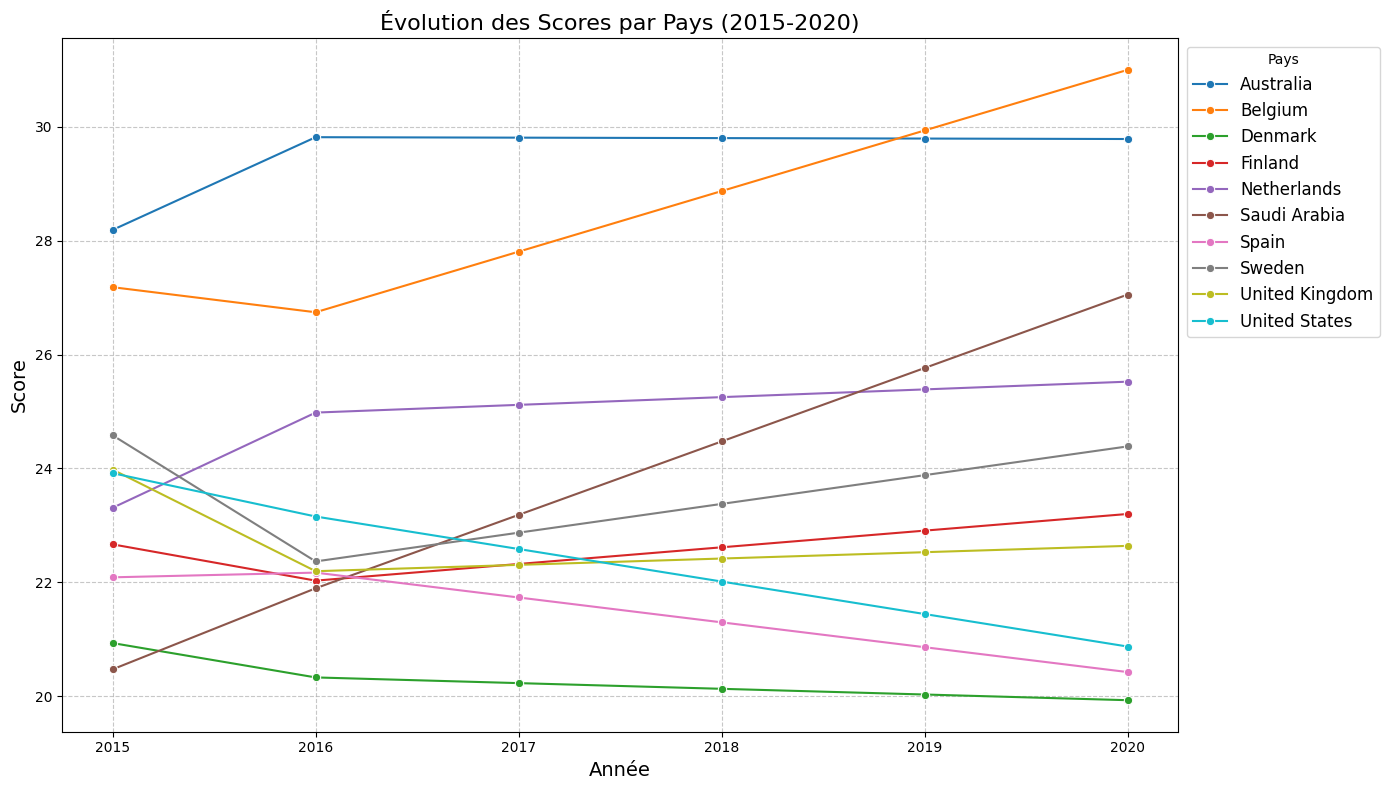

In [75]:
long_df = scores_df

# Créer le lineplot
plt.figure(figsize=(14, 8))
sns.lineplot(data=long_df, x="Year", y="Score", hue="Country Name", marker="o")

# Ajouter des titres et labels
plt.title("Évolution des Scores par Pays (2015-2020)", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(title="Pays", fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.savefig('scores_predicitfs.png')
plt.show()


## Conclusion
- Bien que notre top 3 en se basant sur les valeurs de 2015 présentait:  Australie, Belgique, Suède- 
Les scores prévisionnels pour 2020 nous donne: Belgquem,	Australie, Arabie Saoudite- 
On a donc l'Arabie Saoudite qui est en pleine monté de score et est donc un candidat prometteur pour notre plateforme éducatie .


## Limites
- Ces analyses partent d'un score prédit pour les pays à l'année 2020, malgré notre regression linéaire, les évolutions de ces indicateurs peuvent etre erratiques comme vu précédemment dans la phase d'exploration. Il convient donc d'agir avec prudence.
- Une autre limite importante pour mes scores est les poids choisis pour le calcul pondéré qui sont semi-arbitraire et peuvent ne pas representer parfaitement nos attentes d'un pays